c:\Users\Md Raqeeb Haider\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Md Raqeeb Haider\AppData\Local\Temp\ipykernel_22704\776803546.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
c:\Users\Md Raqeeb Haider\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Using device cpu


100%|██████████| 50/50 [21:08<00:00, 25.37s/it]


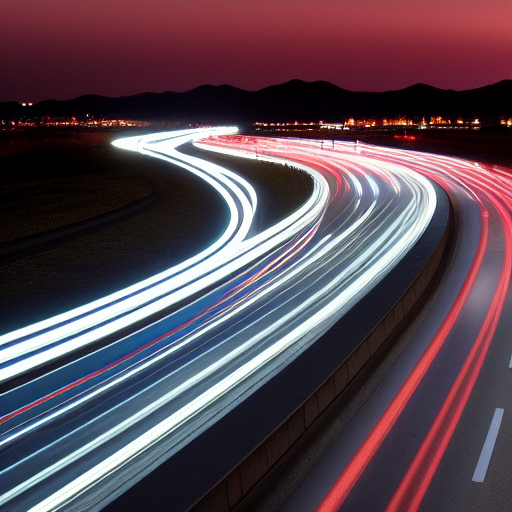

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
     DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
     DEVICE = "mps"
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

prompt = "a car speeding up in the highway in the night, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

input_image = None
image_path = "../images/cat.jpg"
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
     prompt=prompt,
     uncond_prompt=uncond_prompt,
     input_image=input_image,
     strength=strength,
     do_cfg=do_cfg,
     cfg_scale=cfg_scale,
     sampler_name=sampler,
     n_inference_steps=num_inference_steps,
     seed=seed,
     models=models,
     device=DEVICE,
     idle_device="cpu",
     tokenizer=tokenizer
)

Image.fromarray(output_image)